In [41]:
import sympy as smp
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [42]:
m1, m2 = smp.symbols("m1 m2")
k1, k2 = smp.symbols("k1 k2")
x1, x2 = smp.symbols("x1 x2", cls= smp.Function)
t = smp.symbols("t")


In [43]:
x1 = x1(t)
x2 = x2(t)

In [44]:
x1_d = smp.diff(x1,t)
x2_d = smp.diff(x2,t)

x1_dd = smp.diff(x1_d,t)
x2_dd = smp.diff(x2_d,t)

In [45]:
K = smp.Matrix([[k1+k2, -k2],[-k2,k2]])
X = smp.Matrix([x1,x2])

X_dd = smp.Matrix([x1_dd, x2_dd])
M = smp.Matrix([[m1,0],[0, m2]])

In [46]:
acc = M.inv() * -K * X
print(acc)

Matrix([[k2*x2(t)/m1 + (-k1 - k2)*x1(t)/m1], [k2*x1(t)/m2 - k2*x2(t)/m2]])


In [47]:
acc_f = smp.lambdify((m1,m2,k1,k2,x1,x2), acc, 'numpy')

In [48]:
def dsdt(state,t, m1,m2,k1,k2,b):
    x1_v, v1_v, x2_v, v2_v = state
    acc_values_list = acc_f(m1,m2,k1,k2,x1_v,x2_v)
    a1_v, a2_v = acc_values_list.flatten()  #before damping

    dv1dt = a1_v - (b*v1_v/m1)
    dv2dt = a2_v - (b*v2_v/m2)

    return v1_v, dv1dt, v2_v, dv2dt

In [49]:
t_v = np.linspace(0,50,1000)
m1_v= 1
m2_v=1
k1_v= 1
k2_v= 1

b_v = 0.2

initialS = [0, 0, 1, 0]

solutions = odeint(dsdt, initialS, t= t_v, args = (m1_v,m2_v,k1_v,k2_v,b_v))


In [50]:
def get_energy(sol):
    x1 = sol[:,0]
    v1 = sol[:,1]
    x2 = sol[:,2]
    v2 = sol[:,3]

    KE = 0.5*m1_v*v1**2 + 0.5*m2_v*v2**2
    V = 0.5*k1_v*x1**2 + 0.5*k2_v*x2**2

    return KE+V

In [51]:
x1_sol = solutions[:,0]
x2_sol = solutions[:,2]

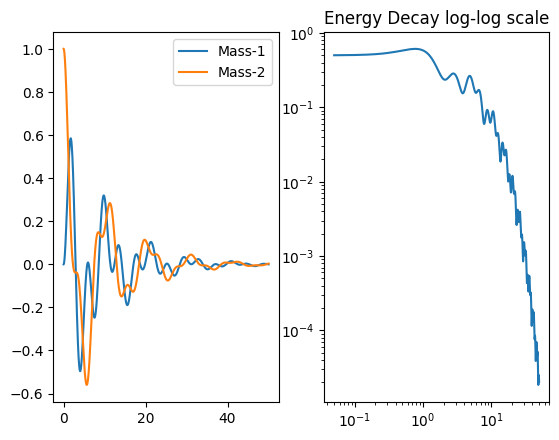

In [53]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(t_v,x1_sol, label = "Mass-1")
plt.plot(t_v,x2_sol, label = "Mass-2")

plt.legend()

plt.subplot(1,2,2)
plt.loglog(t_v[1:], get_energy(solutions)[1:])
plt.title("Energy Decay log-log scale")
plt.show()